In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from collections import Counter

In [5]:
car = pd.read_csv('car_dataset.csv')

In [6]:
# Data ko first rows herne
car.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [7]:
 car.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
car.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [9]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [11]:
# Numerical ra categorical columns ko list banaune
numeric_features = [feature for feature in car.columns if car[feature].dtype != 'O']
categorical_features = [feature for feature in car.columns if car[feature].dtype == 'O']

In [12]:
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features: ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

We have 6 categorical features: ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [13]:
# Missing values check garne
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total = car.isnull().sum().sort_values(ascending=False)
percent = (car.isnull().sum() / car.isnull().count() * 100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percent
car_name,0,0.0
brand,0,0.0
model,0,0.0
vehicle_age,0,0.0
km_driven,0,0.0
seller_type,0,0.0
fuel_type,0,0.0
transmission_type,0,0.0
mileage,0,0.0
engine,0,0.0


In [14]:
# Numerical features ko summary statistics herne
print('Summary Statistics of numerical features for DataFrame are as follows:')
print('-'*100)
car.describe()

Summary Statistics of numerical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [15]:
# Categorical features ko summary statistics herne
print('Summary Statistics of categorical features for DataFrame are as follows:')
print('-'*100)
car.describe(include='object')

Summary Statistics of categorical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


In [16]:
# Mis-spellings ra typos check garne
print('-'*125)
print('Checking records for mis-spell, typo-error etc.')
print('-'*125)

print("'car_name' variable have {} unique category : \n{}\n".format(car['car_name'].nunique(), car['car_name'].unique()))
print('-'*125)

print("'brand' variable have {} unique category : \n{}\n".format(car['brand'].nunique(), car['brand'].unique()))
print('-'*125)

print("'model' variable have {} unique category : \n{}\n".format(car['model'].nunique(), car['model'].unique()))
print('-'*125)

print("'seller_type' variable have {} unique category : \n{}\n".format(car['seller_type'].nunique(), car['seller_type'].unique()))
print('-'*125)

print("'fuel_type' variable have {} unique category : \n{}\n".format(car['fuel_type'].nunique(), car['fuel_type'].unique()))
print('-'*125)

print("'transmission_type' variable have {} unique category : \n{}\n".format(car['transmission_type'].nunique(), car['transmission_type'].unique()))
print('-'*125)

-----------------------------------------------------------------------------------------------------------------------------
Checking records for mis-spell, typo-error etc.
-----------------------------------------------------------------------------------------------------------------------------
'car_name' variable have 121 unique category : 
['Maruti Alto' 'Hyundai Grand' 'Hyundai i20' 'Ford Ecosport'
 'Maruti Wagon R' 'Hyundai i10' 'Hyundai Venue' 'Maruti Swift'
 'Hyundai Verna' 'Renault Duster' 'Mini Cooper' 'Maruti Ciaz'
 'Mercedes-Benz C-Class' 'Toyota Innova' 'Maruti Baleno'
 'Maruti Swift Dzire' 'Volkswagen Vento' 'Hyundai Creta' 'Honda City'
 'Mahindra Bolero' 'Toyota Fortuner' 'Renault KWID' 'Honda Amaze'
 'Hyundai Santro' 'Mahindra XUV500' 'Mahindra KUV100' 'Maruti Ignis'
 'Datsun RediGO' 'Mahindra Scorpio' 'Mahindra Marazzo' 'Ford Aspire'
 'Ford Figo' 'Maruti Vitara' 'Tata Tiago' 'Volkswagen Polo' 'Kia Seltos'
 'Maruti Celerio' 'Datsun GO' 'BMW 5' 'Honda CR-V' 'Ford Endea

In [17]:
print('-'*100)
print('The percentage of each category in categorical column are as follow : ')
print('-'*100 +'\n')
for col in categorical_features:
    print(car[col].value_counts(normalize=True) * 100)
    print('-'*100)

----------------------------------------------------------------------------------------------------
The percentage of each category in categorical column are as follow : 
----------------------------------------------------------------------------------------------------

car_name
Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: proportion, Length: 121, dtype: float64
----------------------------------------------------------------------------------------------------
brand
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW    

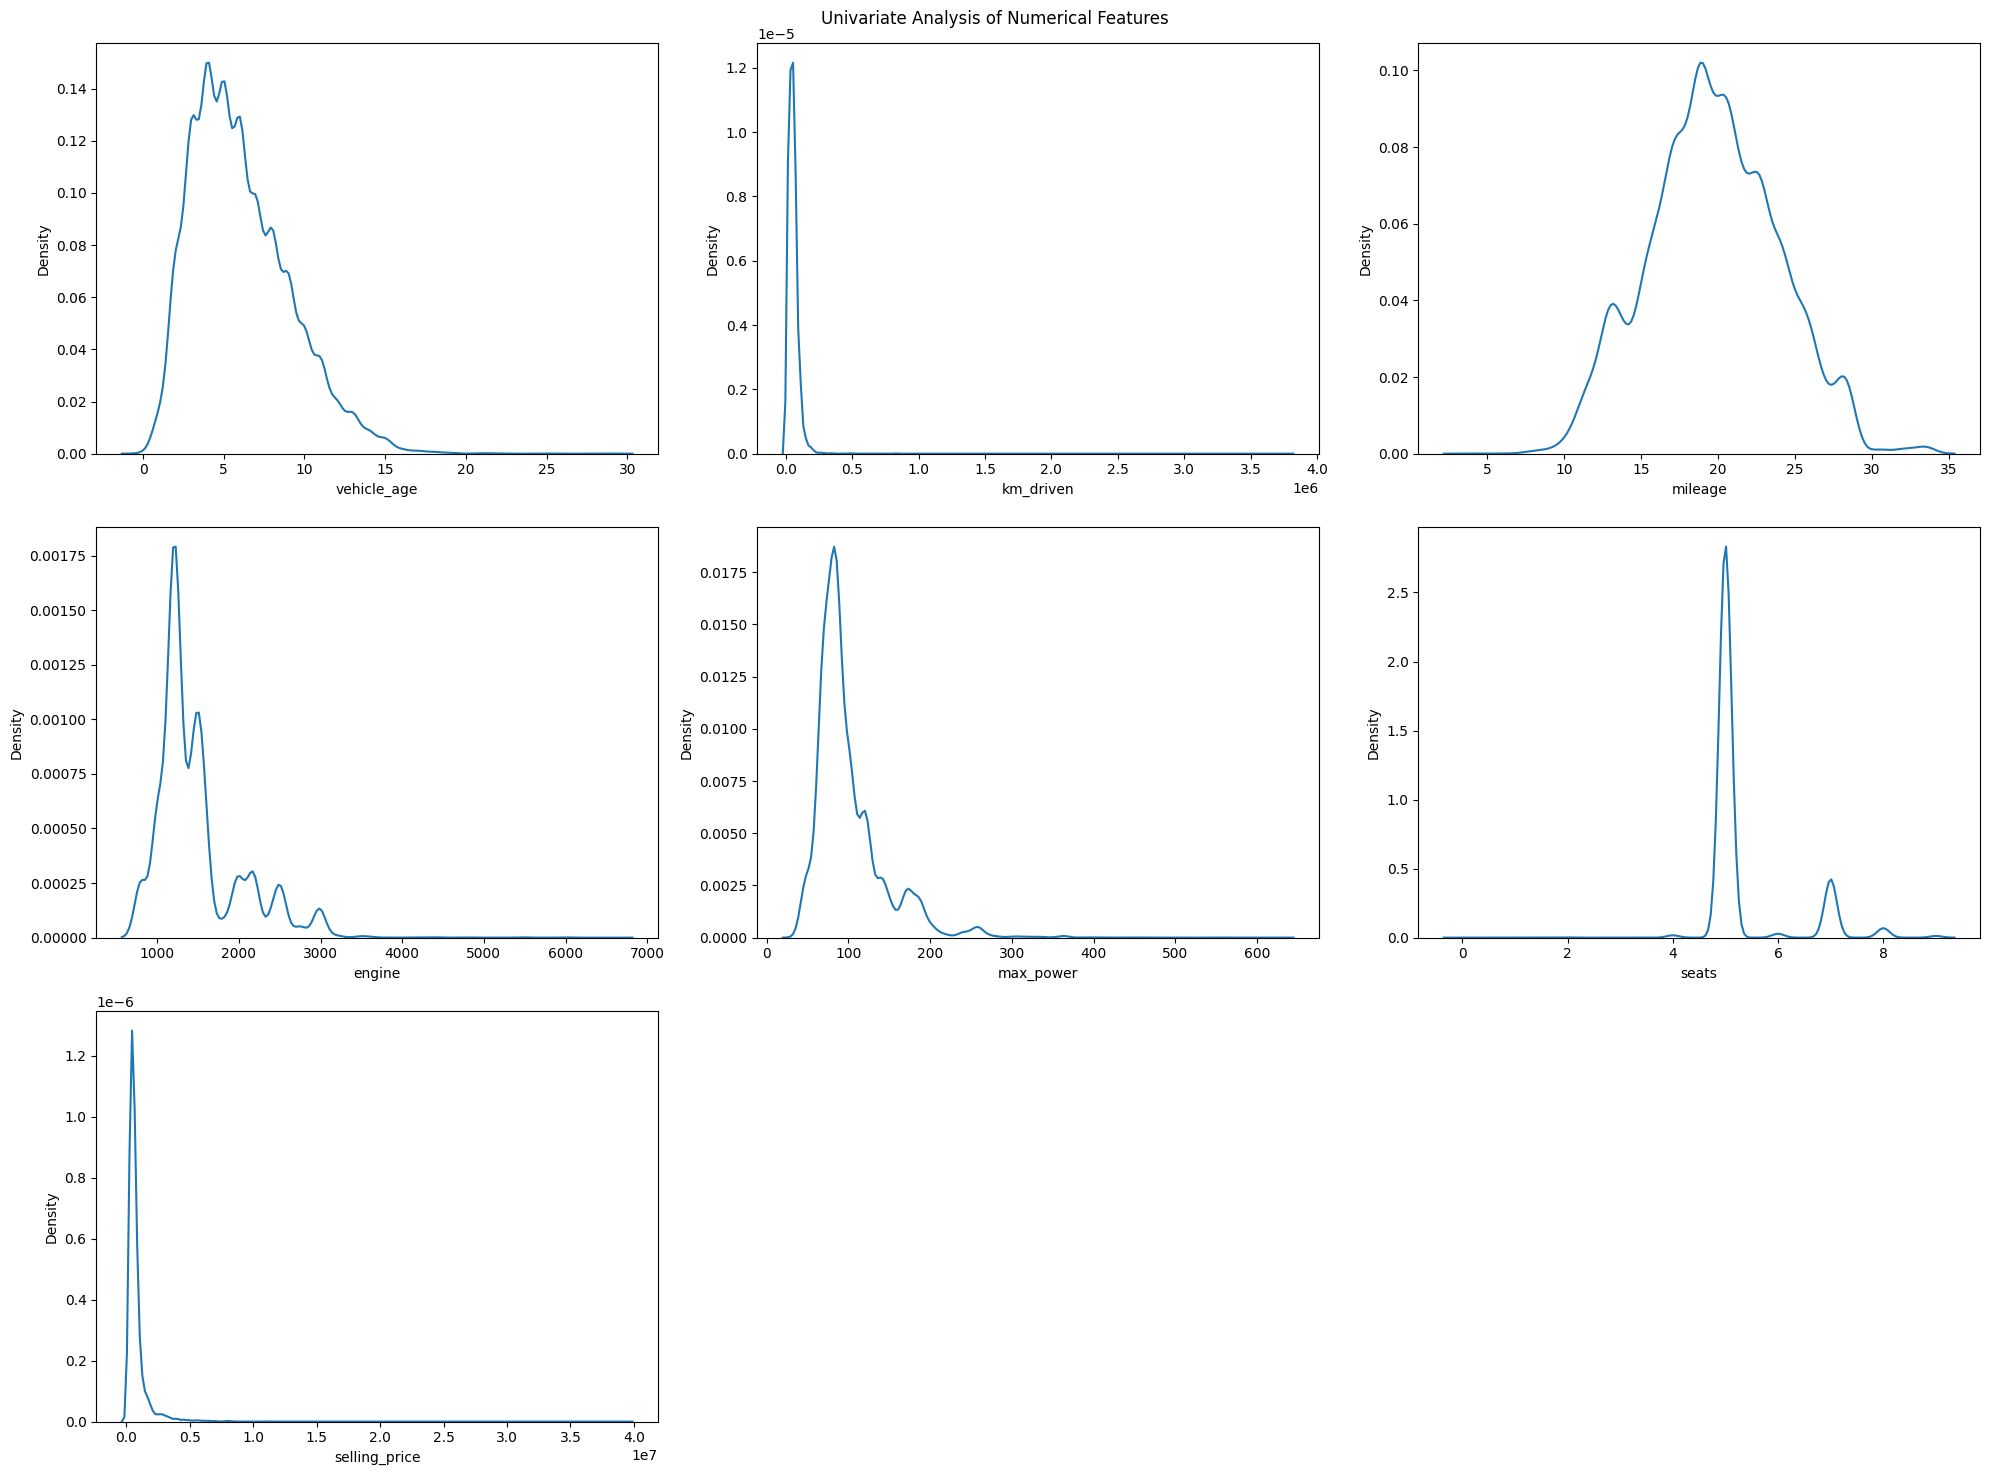

In [28]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Numerical Features')

for i in range(len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=car[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    # Numerical features ko univariate analysis garne

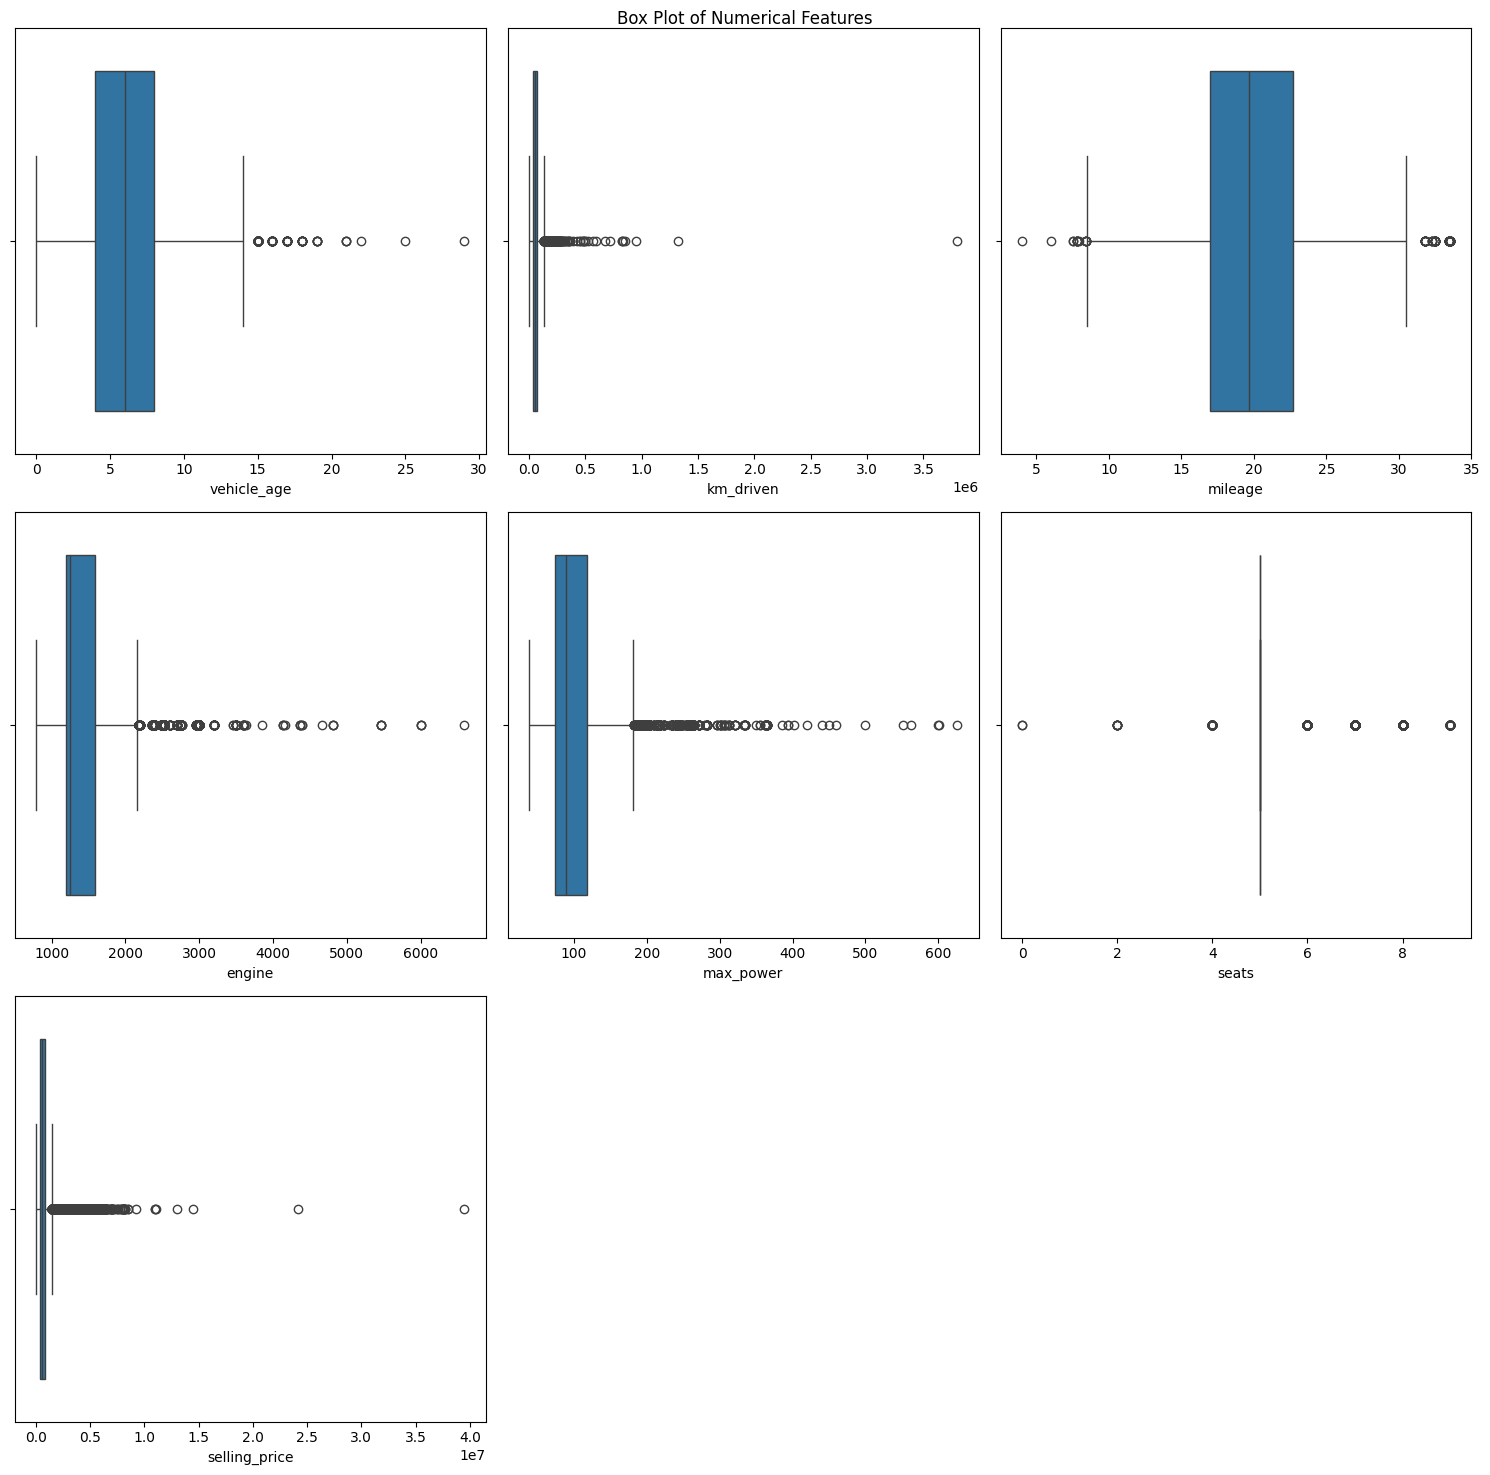

In [19]:
plt.figure(figsize=(15, 15))
plt.suptitle('Box Plot of Numerical Features')

for i in range(len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=car[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    # Numerical features ko box plot banune

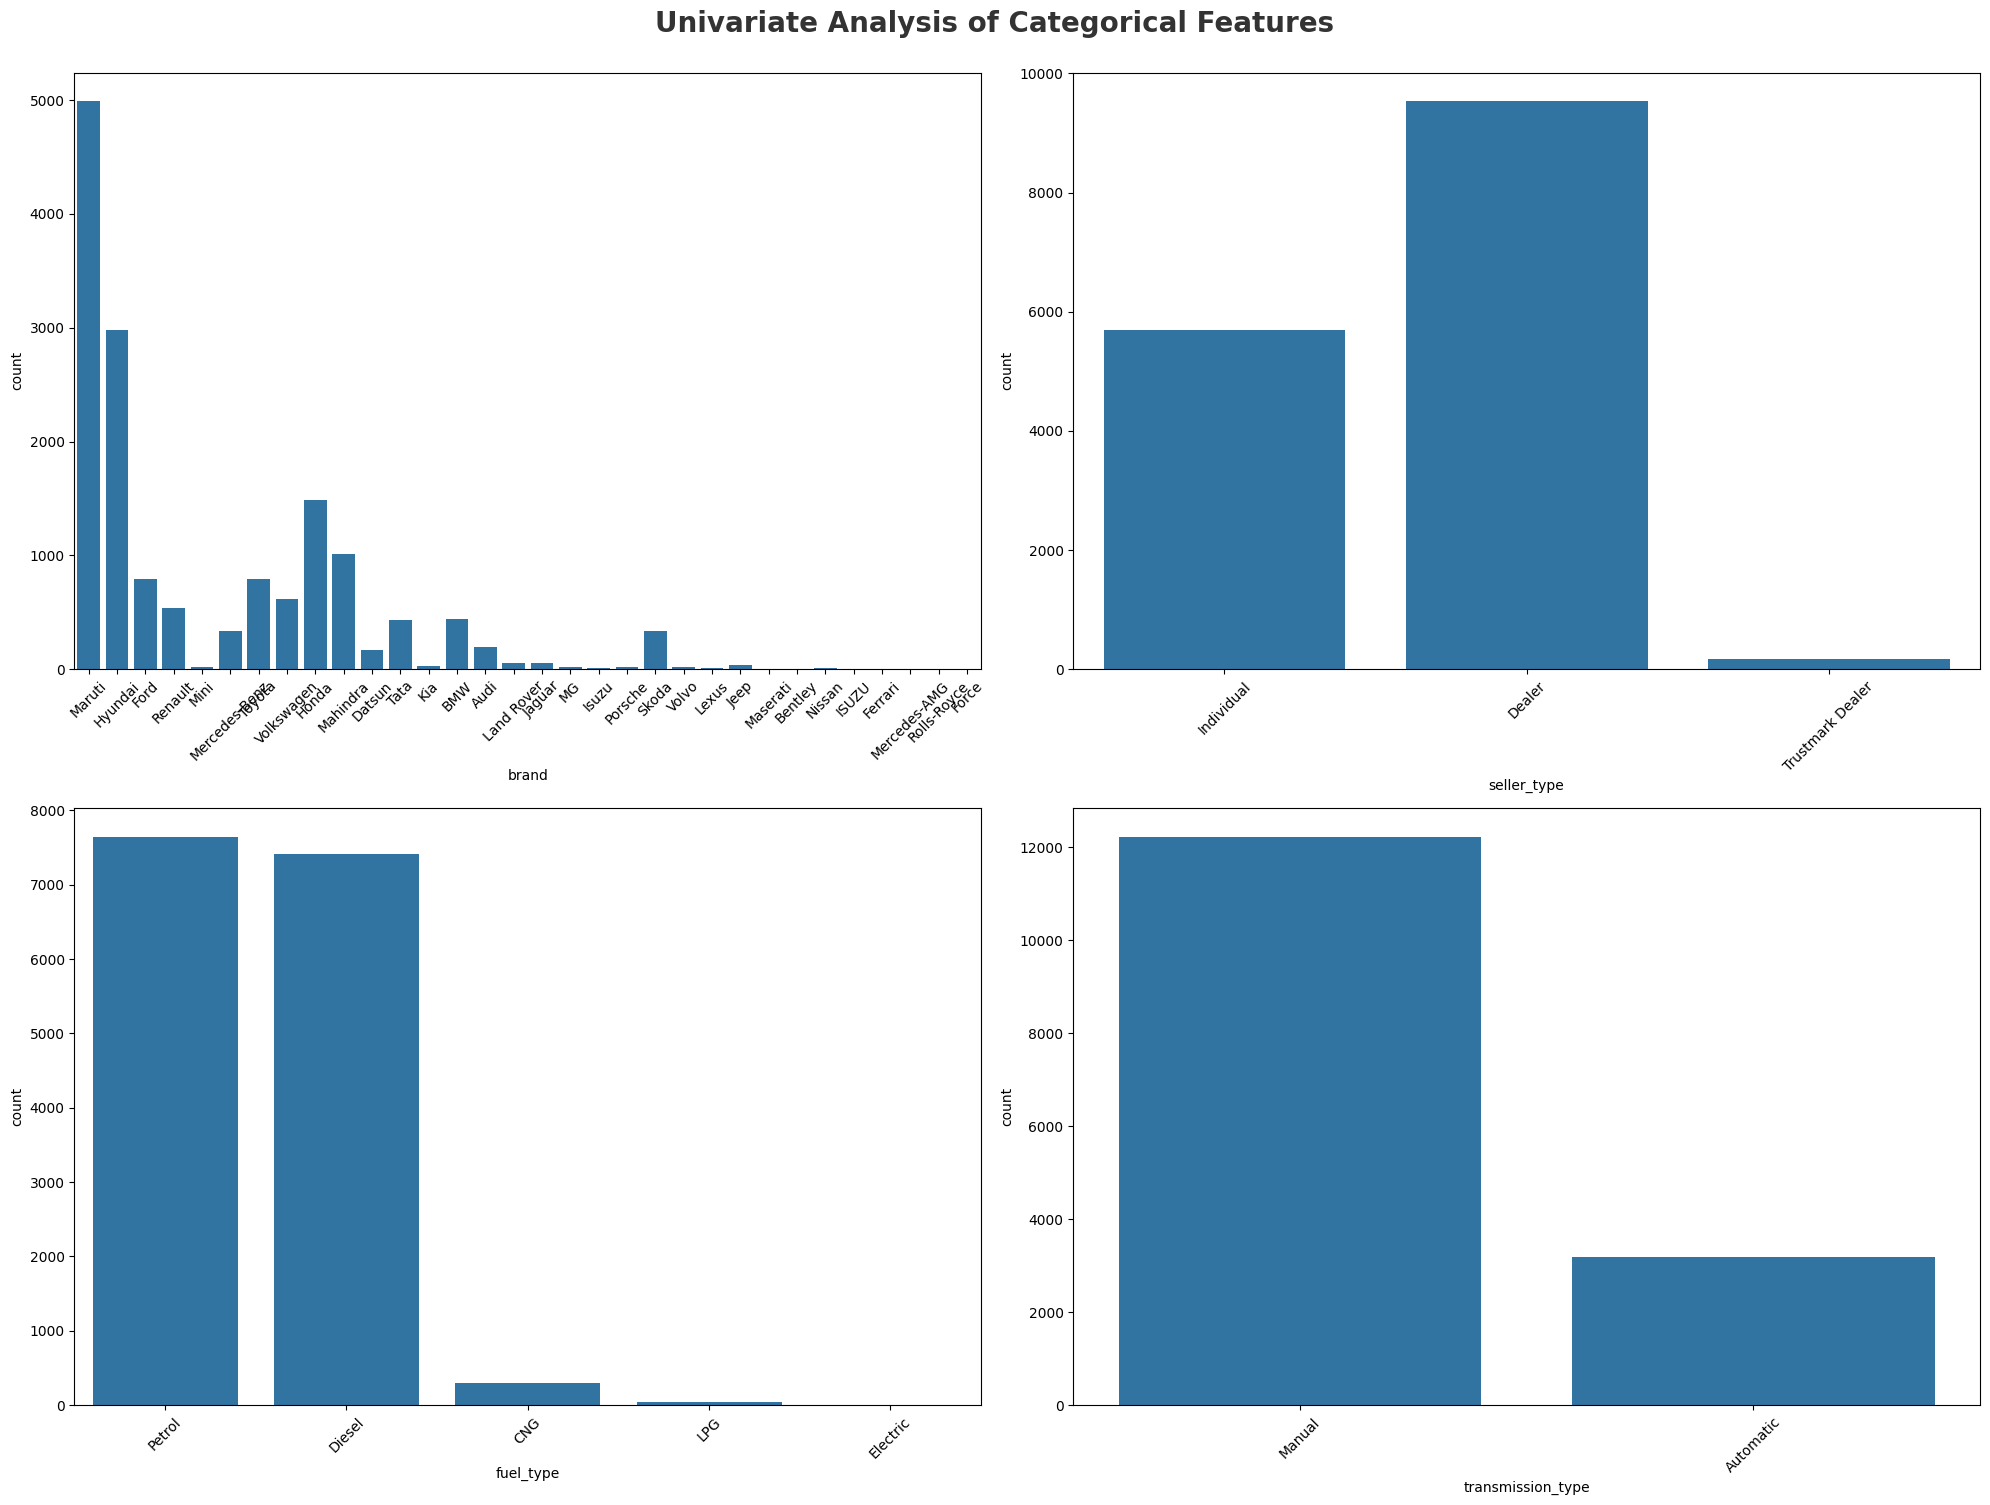

In [20]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

cat1 = ['brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=car[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout() # Categorical features ko univariate analysis garne

In [21]:
# Continuous features ko list banaune
continuous_features = [feature for feature in numeric_features if len(car[feature].unique()) >= 10]
print('Num of continuous features:', continuous_features)

Num of continuous features: ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


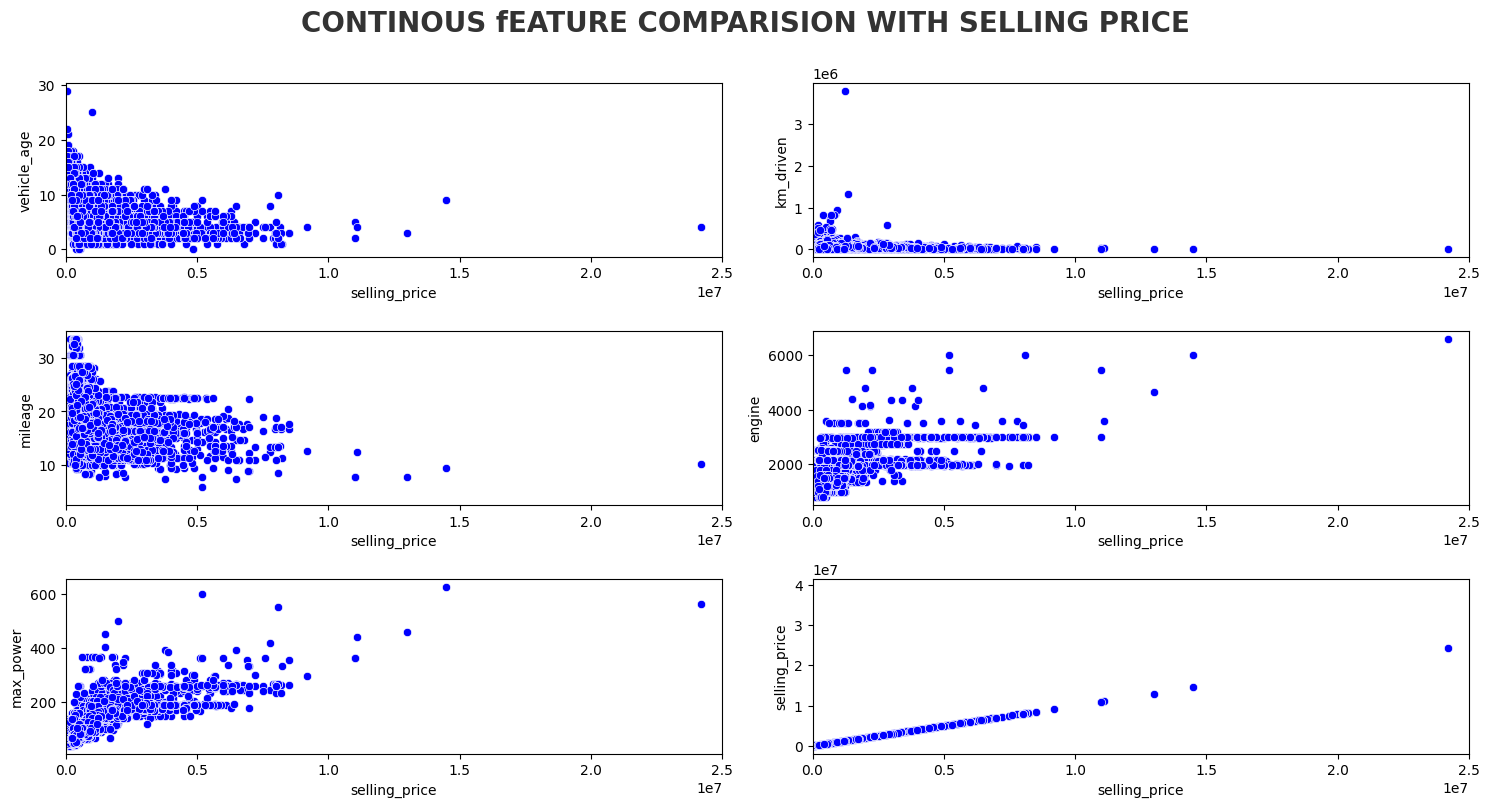

In [29]:
# Continuous features ko scatter plots banune
fig = plt.figure(figsize=(15, 20))
plt.suptitle('CONTINOUS fEATURE COMPARISION WITH SELLING PRICE', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)
for i in range(len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)
    sns.scatterplot(data=car, x='selling_price', y=continuous_features[i], color='b')
    plt.xlim(0, 25000000)  # 25 lakhs Rupees samma limit gareko cha
    plt.tight_layout()

In [23]:
car[numeric_features].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


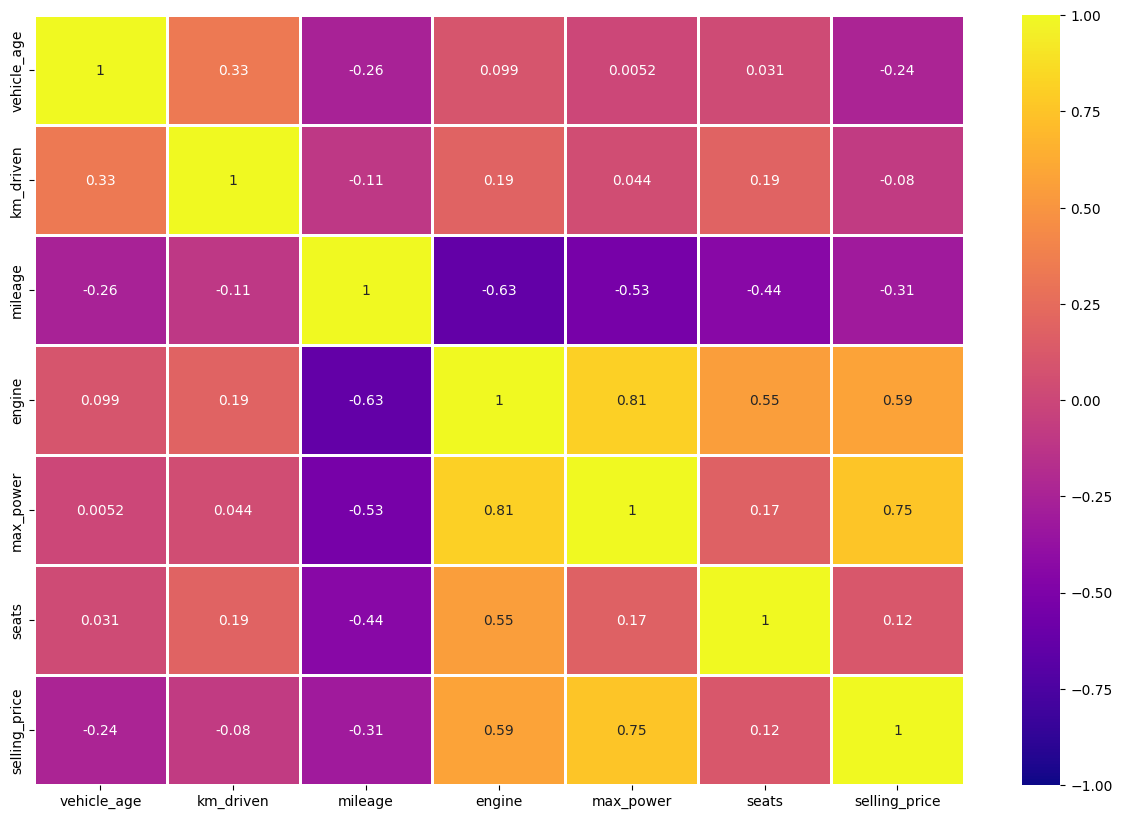

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=car[numeric_features].corr(), annot=True, cmap='plasma', vmin=-1, vmax=1, linecolor='white', linewidths=2)
plt.show()

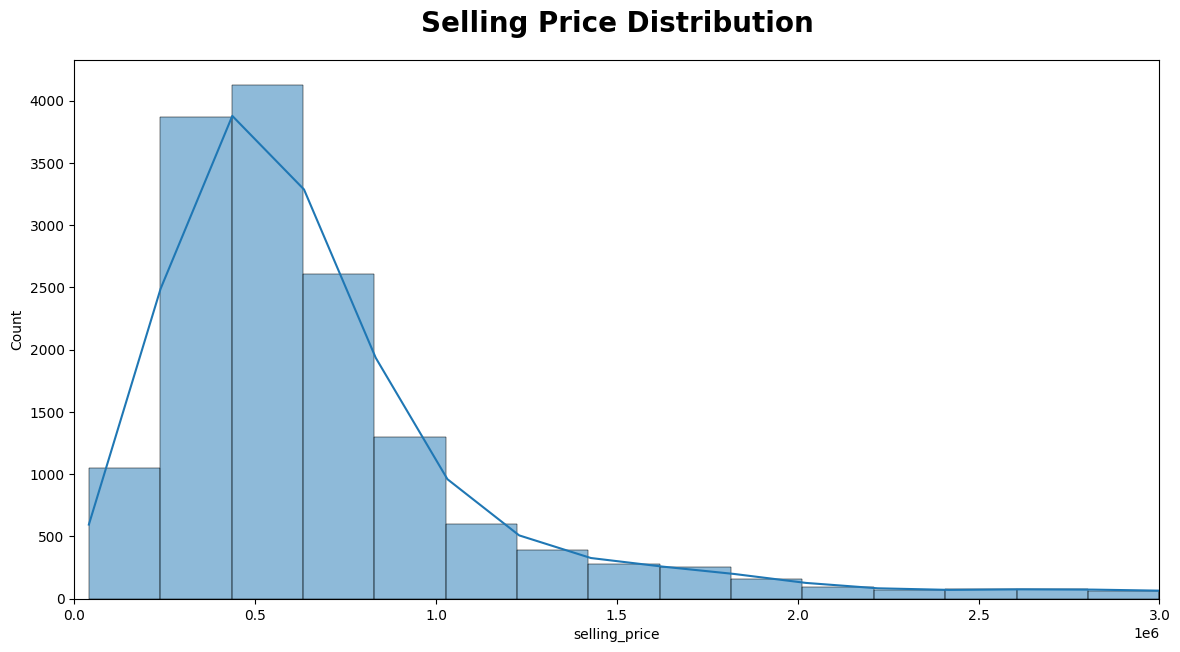

In [31]:
# Selling price ko distribution ko histogram banune
plt.subplots(figsize=(14, 7))
sns.histplot(car.selling_price, bins=200, kde=True)
plt.title("Selling Price Distribution", weight="bold", fontsize=20, pad=20)
plt.xlim(0, 3000000)
plt.show()

In [ ]:
# Top 10 sold cars ko list print garne
print('-'*50)
print('Top 10 Sold Cars on HimalNpne')
print('-'*50)
car.car_name.value_counts()[0:10]

--------------------------------------------------
Top 10 Sold Cars on HimalNpne
--------------------------------------------------


car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: count, dtype: int64

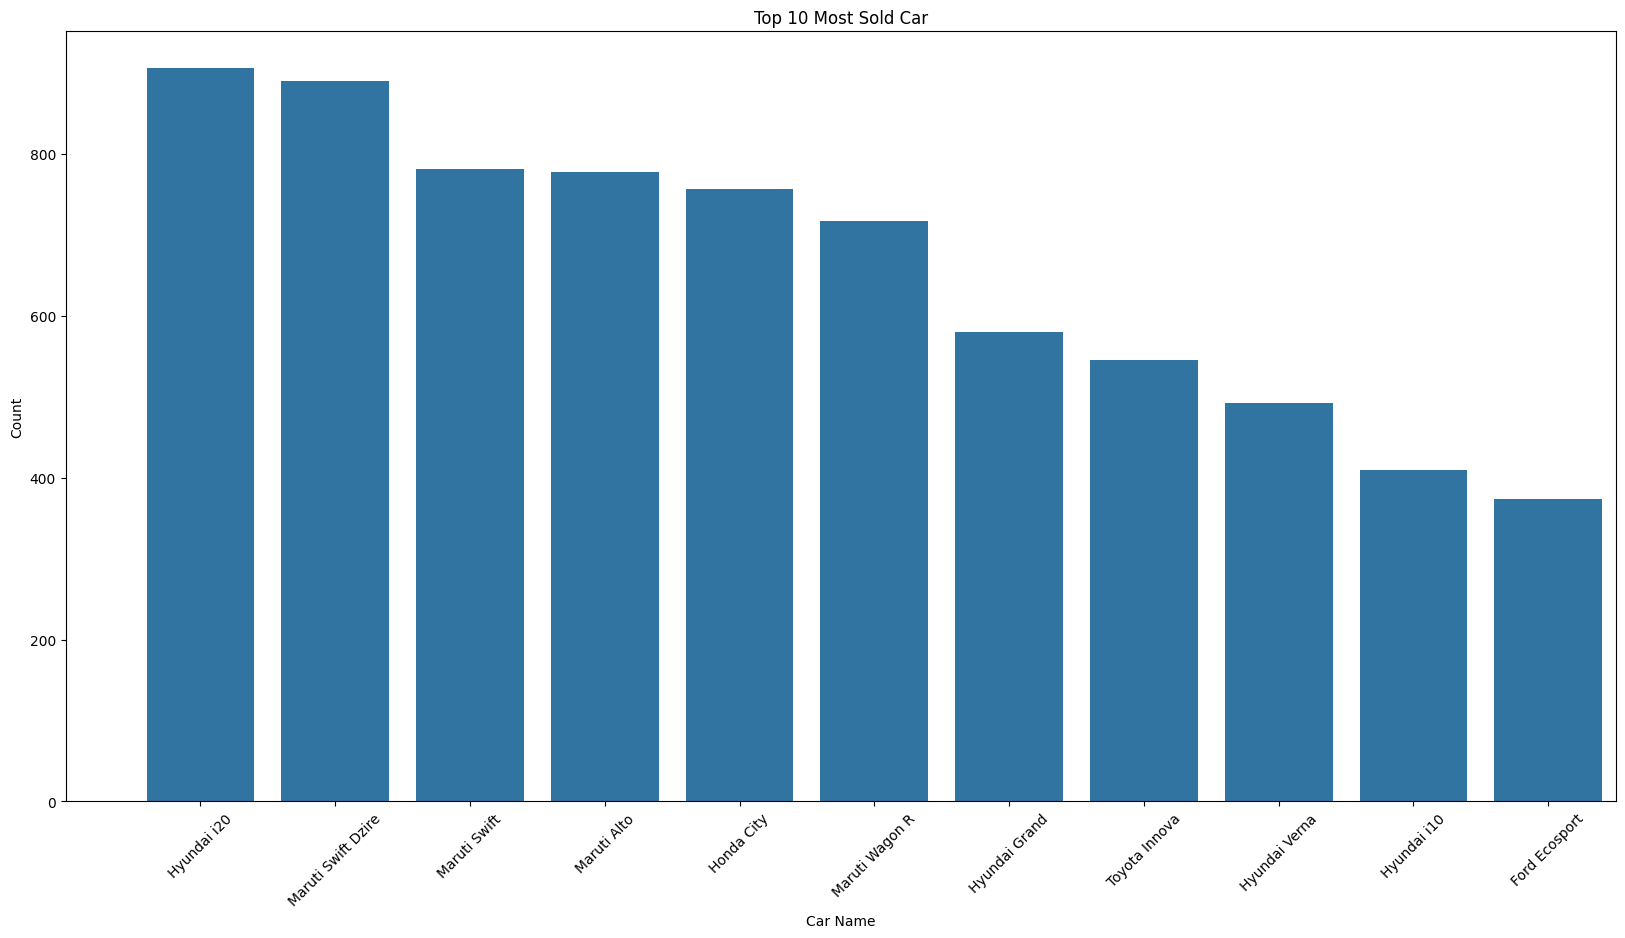

In [ ]:
# Top 10 most sold cars ko count plot banune
plt.subplots(figsize=(20, 10))
sns.countplot(x="car_name", data=car, order=car['car_name'].value_counts().index)
plt.title("Top 10 Most Sold Car")
plt.ylabel("Count")
plt.xlabel("Car Name")
plt.xticks(rotation=45)
plt.xlim(-1, 10.5)
plt.show()

In [ ]:
# Hyundai i20 ko mean price print garne
i20 = car[car['car_name'] == 'Hyundai i20']['selling_price'].mean()
print(f'The mean price of Hyundai i20 is {i20}')

The mean price of Hyundai i20 is 543603.7527593819


In [ ]:
car['mileage'] = car['mileage'].astype(str).str.replace(' km/kg', '').astype(float)
car['engine'] = car['engine'].astype(str).str.replace(' CC', '').astype(float)
car['max_power'] = car['max_power'].astype(str).str.replace(' bhp', '').astype(float)
print(car[['mileage', 'engine', 'max_power']].head()) # Data preparation ra feature engineering

   mileage  engine  max_power
0    19.70   796.0      46.30
1    18.90  1197.0      82.00
2    17.00  1197.0      80.00
3    20.92   998.0      67.10
4    22.77  1498.0      98.59


In [ ]:
car = car.dropna()

In [ ]:
car_encoded = pd.get_dummies(car, columns=categorical_features, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
X = car_encoded.drop('selling_price', axis=1)
y = car_encoded['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
import numpy as np
import pandas as pd

# Decision Tree Class
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values
        self.tree_ = self._build_tree(X, y, depth=0)
    
    def _build_tree(self, X, y, depth):
        num_samples, num_features = X.shape
        if num_samples <= 1 or (self.max_depth is not None and depth >= self.max_depth):
            return np.mean(y)

        best_split = self._find_best_split(X, y)
        if best_split is None:
            return np.mean(y)
        
        left_indices = X[:, best_split['feature']] <= best_split['value']
        right_indices = X[:, best_split['feature']] > best_split['value']
        
        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        
        return {'feature': best_split['feature'], 'value': best_split['value'], 'left': left_tree, 'right': right_tree}
    
    def _find_best_split(self, X, y):
        best_split = None
        best_mse = float('inf')
        num_features = X.shape[1]

        for feature in range(num_features):
            values = np.unique(X[:, feature])
            for value in values:
                left_indices = X[:, feature] <= value
                right_indices = X[:, feature] > value
                
                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue
                
                left_y = y[left_indices]
                right_y = y[right_indices]
                
                mse = (np.var(left_y) * len(left_y) + np.var(right_y) * len(right_y)) / len(y)
                
                if mse < best_mse:
                    best_split = {'feature': feature, 'value': value}
                    best_mse = mse
        
        return best_split

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        return np.array([self._predict(sample, self.tree_) for sample in X])
    
    def _predict(self, sample, tree):
        if not isinstance(tree, dict):
            return tree
        
        if sample[tree['feature']] <= tree['value']:
            return self._predict(sample, tree['left'])
        else:
            return self._predict(sample, tree['right'])

# Random Forest Class
class RandomForest:
    def __init__(self, n_estimators=100, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values
        for _ in range(self.n_estimators):
            X_resampled, y_resampled = resample(X, y)
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X_resampled, y_resampled)
            self.trees.append(tree)
    
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(tree_predictions, axis=0)

# Load your dataset
car = pd.read_csv('car_dataset.csv')
X = car.drop('selling_price', axis=1)
y = car['selling_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the RandomForest model
rf_model = RandomForest(n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse:.2f}')


Root Mean Squared Error: 233780.19
